In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

In [2]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
train_df['location'].value_counts()

Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
                  ... 
1Hanuman Nagar       1
Iggalur              1
Prasanti Nagar       1
Bank Avenue          1
BAGUR                1
Name: location, Length: 1305, dtype: int64

In [5]:
x_location = train_df['location'].value_counts()[:17].index.to_list()
x_location

['Whitefield',
 'Sarjapur  Road',
 'Electronic City',
 'Kanakpura Road',
 'Thanisandra',
 'Yelahanka',
 'Uttarahalli',
 'Hebbal',
 'Marathahalli',
 'Raja Rajeshwari Nagar',
 'Hennur Road',
 'Bannerghatta Road',
 '7th Phase JP Nagar',
 'Haralur Road',
 'Electronic City Phase II',
 'Rajaji Nagar',
 'Chandapura']

<AxesSubplot:xlabel='location', ylabel='price'>

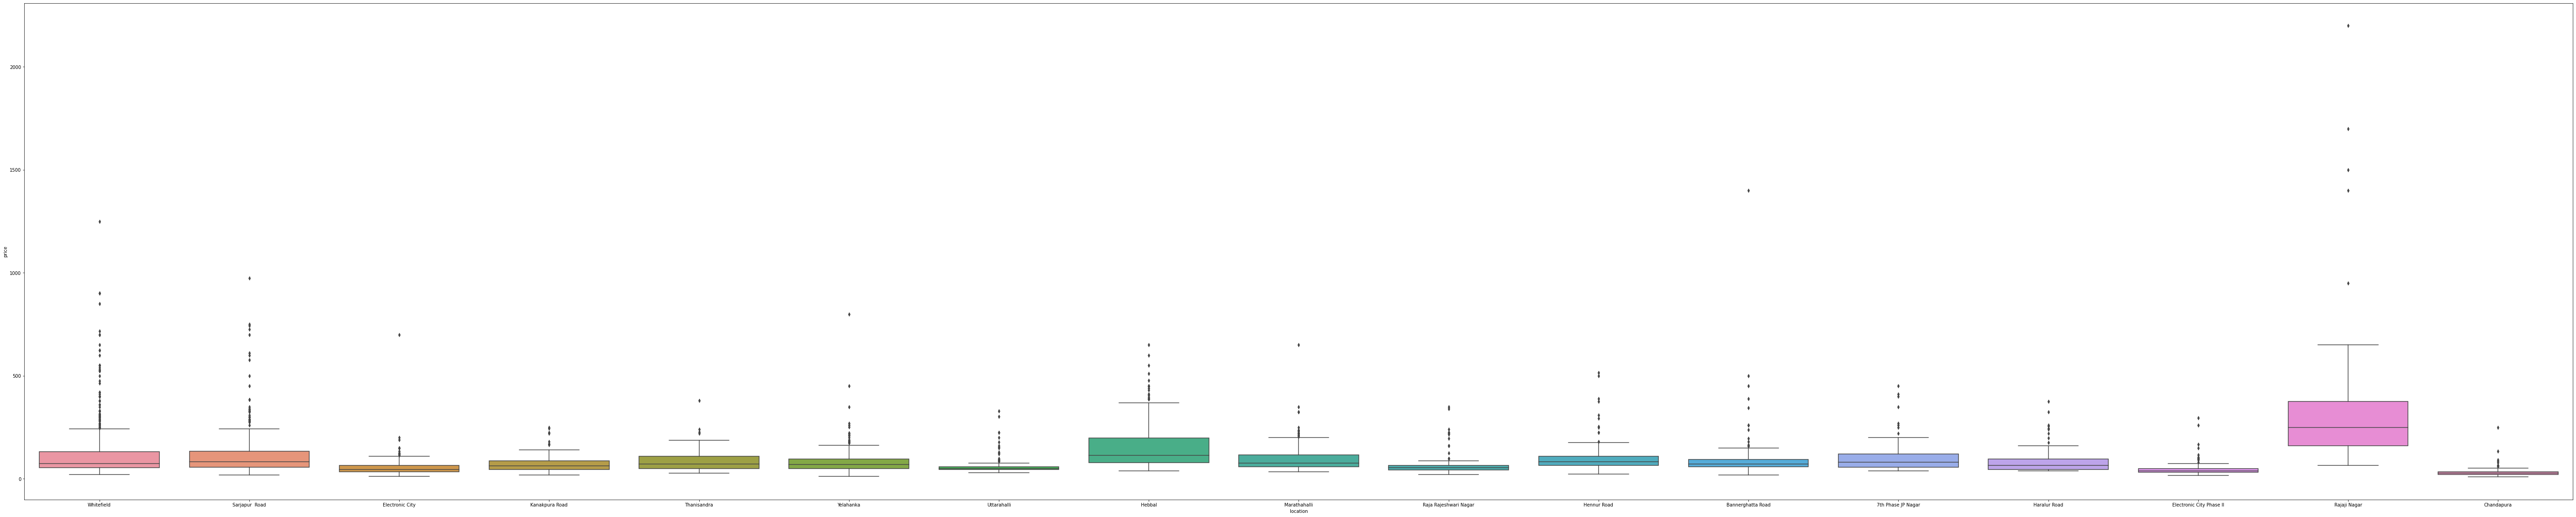

In [6]:
plt.figure(figsize=(100,20))
sns.boxplot(x='location',y='price',data=train_df,order=x_location)

In [7]:
x_location=['Whitefield','Hebbal','Rajaji Nagar']
x_location

['Whitefield', 'Hebbal', 'Rajaji Nagar']

In [8]:
scipy.stats.f_oneway(train_df[train_df['location']=='Whitefield']['price'],
                    train_df[train_df['location']=='Hebbal']['price'],
                    train_df[train_df['location']=='Rajaji Nagar']['price'])

F_onewayResult(statistic=60.621195608517674, pvalue=2.7803702694173887e-25)

In [9]:
for location in x_location:
    train_df['location'+'_'+location] = np.where(train_df['location']==location,1,0)
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,location_Whitefield,location_Hebbal,location_Rajaji Nagar
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0


In [10]:
train_df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [11]:
x_area=train_df['area_type'].value_counts().index.to_list()
x_area

['Super built-up  Area', 'Built-up  Area', 'Plot  Area', 'Carpet  Area']

<AxesSubplot:xlabel='area_type', ylabel='price'>

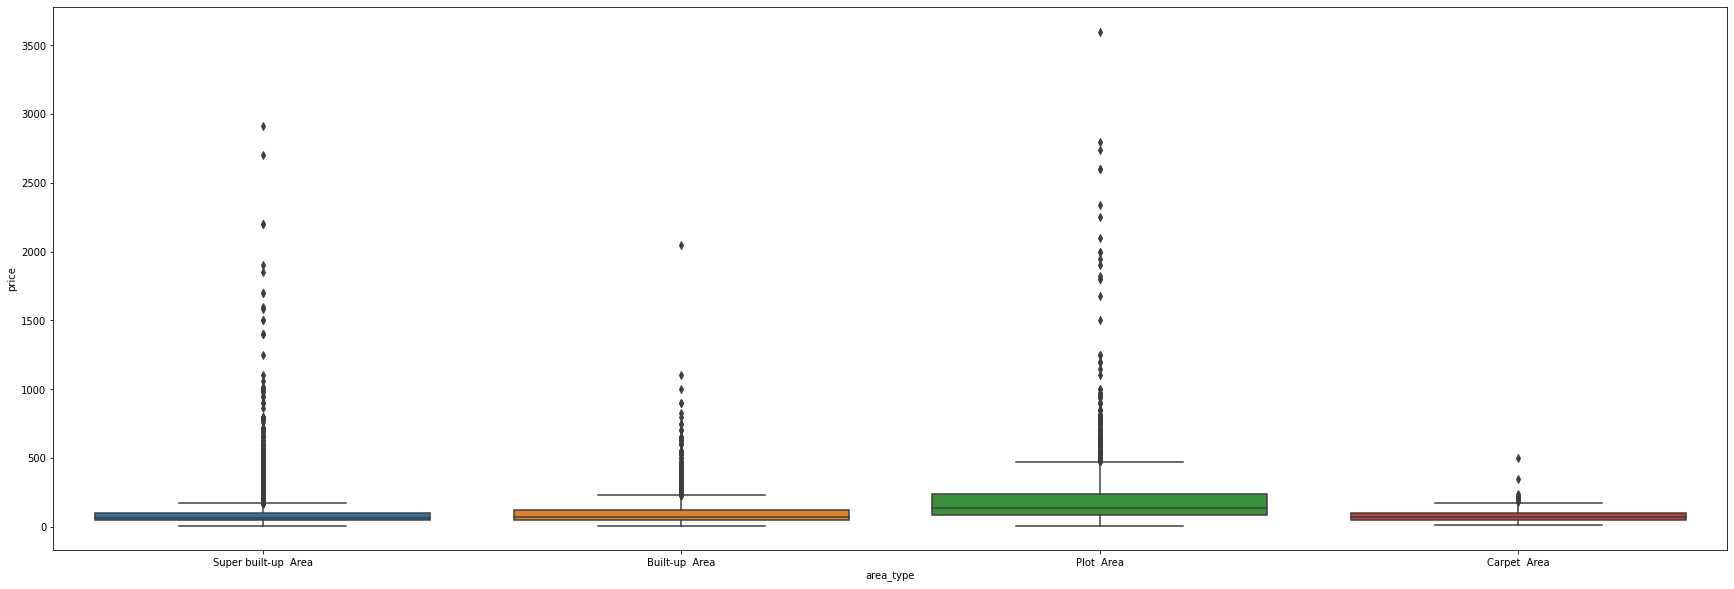

In [12]:
plt.figure(figsize=(30,10))
sns.boxplot(x='area_type',y='price',data=train_df,order=x_area)

In [13]:
scipy.stats.f_oneway(train_df[train_df['area_type']=='Super built-up  Area']['price'],
                    train_df[train_df['area_type']=='Plot  Area']['price'])

F_onewayResult(statistic=973.2367870937877, pvalue=1.1652630638809671e-204)

In [14]:
x_area=[x_area[0],x_area[2]]
x_area

['Super built-up  Area', 'Plot  Area']

In [15]:
for area in x_area:
    train_df['area'+'_'+area] = np.where(train_df['area_type']==location,1,0)
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,location_Whitefield,location_Hebbal,location_Rajaji Nagar,area_Super built-up Area,area_Plot Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,0,0


In [16]:
train_df['availability'] = np.where(train_df['availability']=='Ready To Move',1,0)
train_df['availability'].head()

0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: int32

<AxesSubplot:xlabel='availability', ylabel='price'>

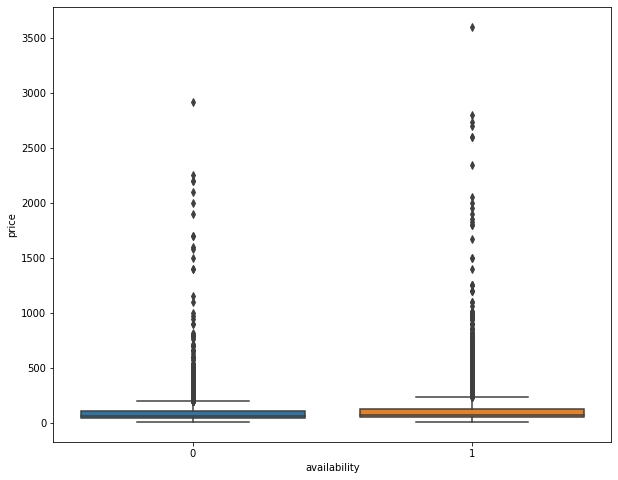

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='availability',y='price',data=train_df)

In [18]:
scipy.stats.f_oneway(train_df[train_df['availability']==1]['price'],
                    train_df[train_df['availability']==0]['price'])

F_onewayResult(statistic=15.854923871722248, pvalue=6.87516155584131e-05)

In [19]:
size_mode = train_df['size'].mode()
train_df['size'].fillna(size_mode[0],inplace=True)

In [20]:
y=list(train_df['size'].values)
z=[]
for i in y:
    z.append(i.split()[0]+' BHK')
train_df['size'] = z

In [21]:
x_size=train_df['size'].value_counts().index.to_list()

<AxesSubplot:xlabel='size', ylabel='price'>

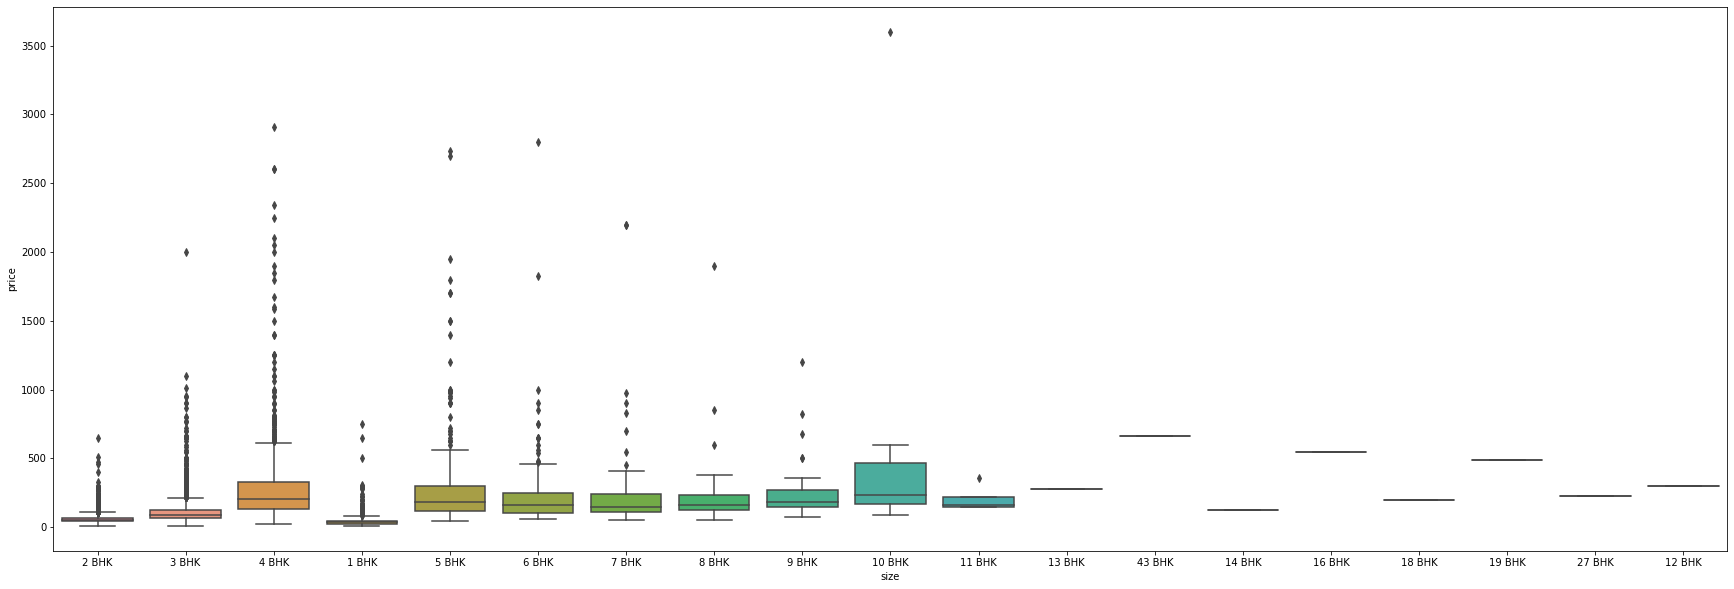

In [22]:
plt.figure(figsize=(30,10))
sns.boxplot(x='size',y='price',data=train_df,order=x_size)

In [23]:
x_size = ['2 BHK','3 BHK','4 BHK','1 BHK']
scipy.stats.f_oneway(train_df[train_df['size']=='1 BHK']['price'],
                    train_df[train_df['size']=='2 BHK']['price'],
                    train_df[train_df['size']=='3 BHK']['price'],
                    train_df[train_df['size']=='4 BHK']['price'])

F_onewayResult(statistic=1546.5777201228532, pvalue=0.0)

In [24]:
for size in x_size:
    train_df['size'+'_'+size] = np.where(train_df['size']==size,1,0)
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,location_Whitefield,location_Hebbal,location_Rajaji Nagar,area_Super built-up Area,area_Plot Area,size_2 BHK,size_3 BHK,size_4 BHK,size_1 BHK
0,Super built-up Area,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,0,0,1,0,0,0
1,Plot Area,1,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,0,0,0,0,0,0,0,1,0
2,Built-up Area,1,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0,0,0,0,1,0,0
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,0,0,0,1,0,0
4,Super built-up Area,1,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,0,0,1,0,0,0


In [25]:
x_society = train_df['society'].value_counts()[:20].index.to_list()
train_df['society'].value_counts().index[:20]

Index(['GrrvaGr', 'PrarePa', 'Prtates', 'Sryalan', 'GMown E', 'Prtanha',
       'Bhmesy ', 'Prityel', 'PrityTr', 'Prarkun', 'Dhalsh ', 'IBityin',
       'SNity S', 'Soresea', 'Adeatlm', 'Soitya ', 'Bhe 2ko', 'Rosha I',
       'SunceEs', 'SNnia E'],
      dtype='object')

<AxesSubplot:xlabel='society', ylabel='price'>

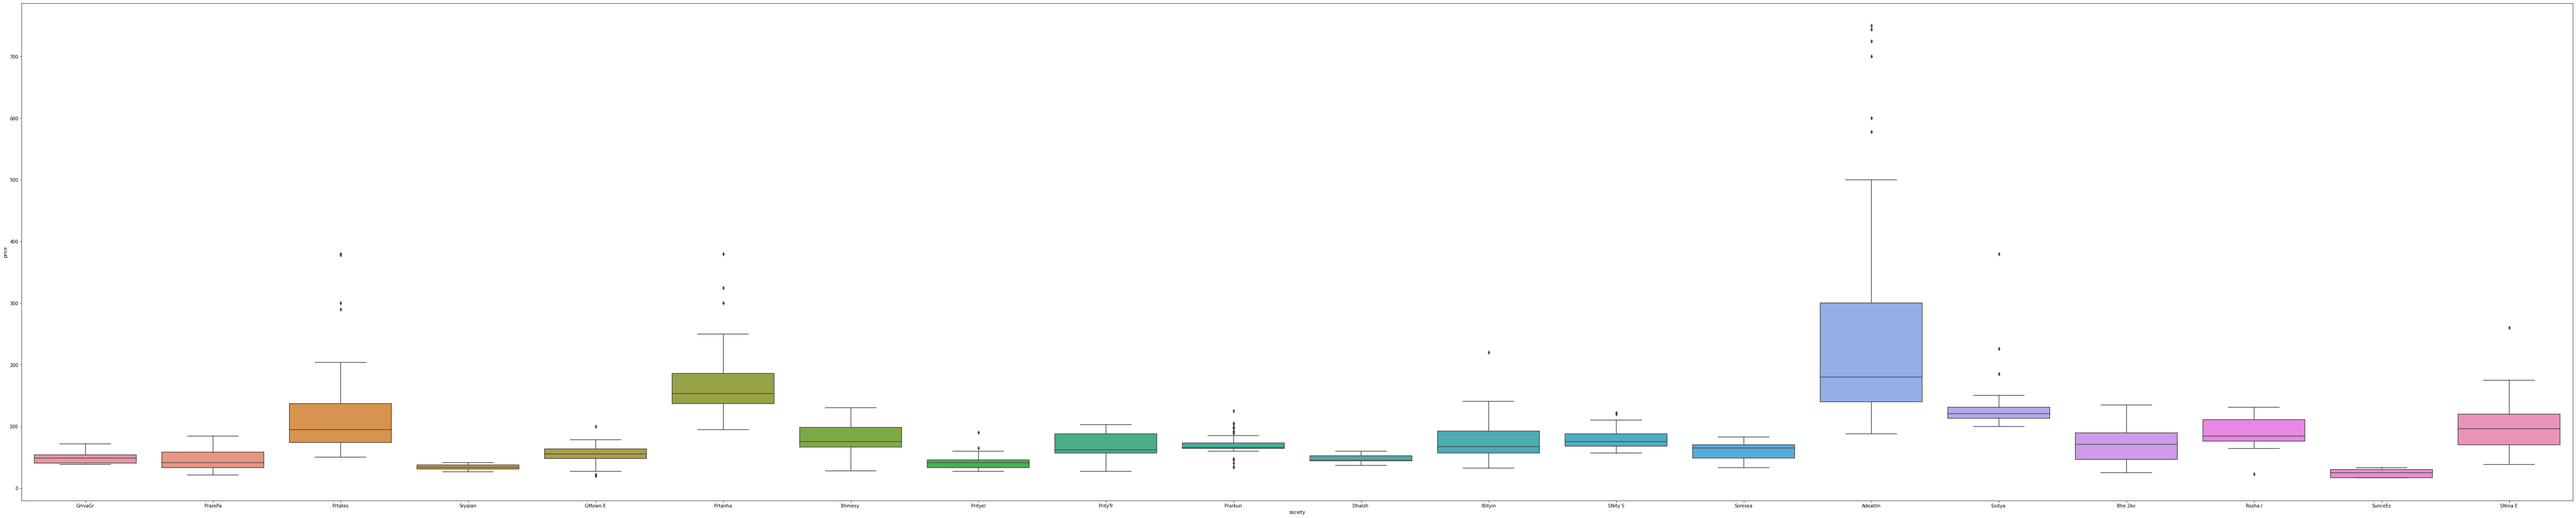

In [26]:
plt.figure(figsize=(100,20))
sns.boxplot(x='society',y='price',data=train_df,order=x_society)

In [27]:
x_society=['GrrvaGr', 'Prtates', 'GMown E', 'Prtanha', 'Adeatlm','Soitya ','Rosha I',]
scipy.stats.f_oneway(train_df[train_df['society']=='GrrvaGr']['price'],
                   train_df[train_df['society']=='Prtates']['price'],
                   train_df[train_df['society']=='GMown E']['price'],
                   train_df[train_df['society']=='Prtanha']['price'],
                   train_df[train_df['society']=='Adeatlm']['price'],
                   train_df[train_df['society']=='Soitya ']['price'],
                   train_df[train_df['society']=='Rosha I']['price'])

F_onewayResult(statistic=44.05637012601754, pvalue=6.17515963108845e-40)

In [28]:
for society in x_society:
    train_df['society'+'_'+society] = np.where(train_df['society']==society,1,0)
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,location_Whitefield,...,size_3 BHK,size_4 BHK,size_1 BHK,society_GrrvaGr,society_Prtates,society_GMown E,society_Prtanha,society_Adeatlm,society_Soitya,society_Rosha I
0,Super built-up Area,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,1,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,0,...,0,1,0,0,0,0,0,0,0,0
2,Built-up Area,1,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,...,1,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,...,1,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_df['total_sqft'].nunique()

2117

In [30]:
x1=[]
for i in list(train_df['total_sqft'].values):
    if('-' in i):
        x1.append(str(float(i.split('-')[0])+float(i.split('-')[1])/2))
    elif('Sq. Meter' in i):
        x1.append(str(float(i.replace('Sq. Meter',''))*10.764))
    elif('Perch' in i):
        x1.append(str(float(i.replace('Perch',''))*272.25))
    elif('Sq. Yards' in i):
        x1.append(str(float(i.replace('Sq. Yards',''))*9))
    elif('Acres' in i):
        x1.append(str(float(i.replace('Acres',''))*43560))
    elif('Cents' in i):
        x1.append(str(float(i.replace('Cents',''))*435.6))
    elif('Guntha' in i):
        x1.append(str(float(i.replace('Guntha',''))*1089))
    elif('Grounds' in i):
         x1.append(str(float(i.replace('Grounds',''))*2400))
    else:
        x1.append(i)


In [31]:
train_df['total_sqft']=x1
train_df['total_sqft'] = train_df['total_sqft'].astype('float')
train_df['total_sqft'].dtype

dtype('float64')

In [32]:
train_df['total_sqft'].isnull().value_counts()

False    13320
Name: total_sqft, dtype: int64

In [33]:
x_bath_mode=train_df['bath'].mode()
train_df['bath'].fillna(x_bath_mode[0],inplace=True)

In [34]:
train_df['bath'].isnull().value_counts()

False    13320
Name: bath, dtype: int64

In [35]:
train_df['balcony'].isnull().value_counts()

False    12711
True       609
Name: balcony, dtype: int64

In [36]:
x_balcony_mode = train_df['balcony'].mode()
train_df['balcony'].fillna(x_balcony_mode[0],inplace=True)

In [37]:
train_df['balcony'].isnull().value_counts()

False    13320
Name: balcony, dtype: int64

<AxesSubplot:>

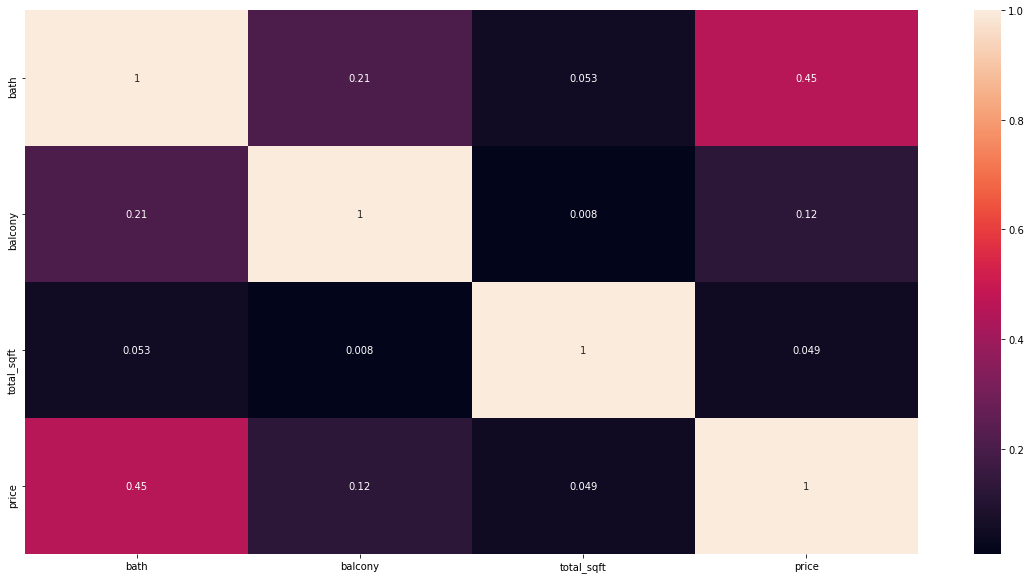

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df[['bath','balcony','total_sqft','price']].corr(method='pearson'),annot = True)

In [39]:
scipy.stats.pearsonr(train_df['bath'],train_df['price'])

(0.454448714673187, 0.0)

In [40]:
scipy.stats.pearsonr(train_df['total_sqft'],train_df['price'])

(0.049247478297545604, 1.295313259230317e-08)

In [41]:
scipy.stats.pearsonr(train_df['balcony'],train_df['price'])

(0.12495135258521493, 1.7097567755113958e-47)

In [42]:
X=train_df.drop(['area_type','size','location','society','price'],axis=1).values
y=train_df['price'].values

In [43]:
X.shape

(13320, 20)

In [44]:
y.shape

(13320,)

In [45]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.96547417, -0.05024856, -0.51453799, ..., -0.05277798,
        -0.05205792, -0.05132787],
       [ 0.50878308,  0.0391179 ,  1.72643617, ..., -0.05277798,
        -0.05205792, -0.05132787],
       [ 0.50878308, -0.0280227 , -0.51453799, ..., -0.05277798,
        -0.05205792, -0.05132787],
       ...,
       [ 0.50878308, -0.04532877, -0.51453799, ..., -0.05277798,
        -0.05205792, -0.05132787],
       [-1.96547417,  0.16002886,  0.97944479, ..., -0.05277798,
        -0.05205792, -0.05132787],
       [ 0.50878308, -0.07953575, -1.26152937, ..., -0.05277798,
        -0.05205792, -0.05132787]])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
yhat = lm.predict(X_test)
yhat

array([ 56.3315695 , 112.93836789,  84.51566049, ...,  56.31880335,
        56.35523358, 186.67775786])

In [49]:
y_test

array([ 64.8, 125. ,  60. , ...,  65. ,  69. ,  70. ])

c:\users\ajay7\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\ajay7\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


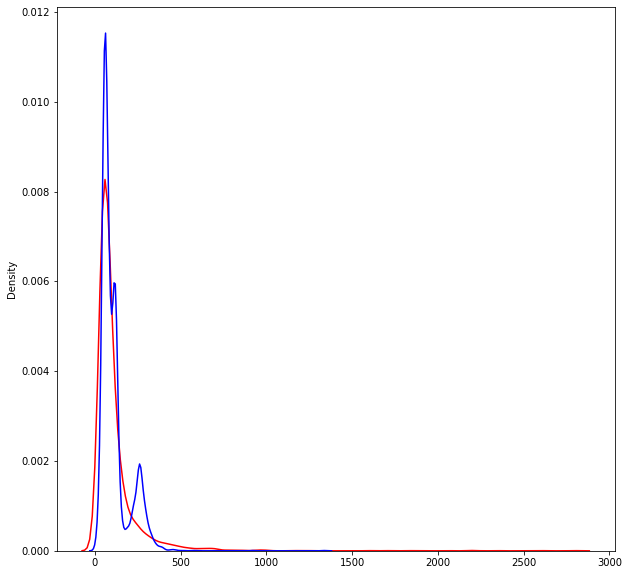

In [50]:
plt.figure(figsize=(10, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
import math
error_test = mean_squared_error(y_test,yhat)
math.sqrt(error_test)

124.69016594203839

In [52]:
yhat_train=lm.predict(X_train)
error_train = mean_squared_error(y_train,yhat_train)
math.sqrt(error_train)

127.31810995471507

In [53]:
df = pd.read_csv('Test.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,availability,total_sqft,bath,balcony,location_Whitefield,location_Hebbal,location_Rajaji Nagar,area_Super built-up Area,area_Plot Area,size_2 BHK,size_3 BHK,size_4 BHK,size_1 BHK,society_GrrvaGr,society_Prtates,society_GMown E,society_Prtanha,society_Adeatlm,society_Soitya,society_Rosha I
0,1,1225.0,2.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,2400.0,9.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1650.0,5.0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1322.0,3.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1161.0,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape


(1480, 20)

In [55]:
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(df).transform(df)
X1

array([[ 0.52313105, -0.08469879, -0.55045684, ..., -0.03678559,
        -0.07821948, -0.05205792],
       [ 0.52313105,  0.122202  ,  4.58714031, ..., -0.03678559,
        -0.07821948, -0.05205792],
       [-1.91156691, -0.00986234,  1.65137051, ..., -0.03678559,
        -0.07821948, -0.05205792],
       ...,
       [ 0.52313105, -0.08628356, -0.55045684, ..., -0.03678559,
        -0.07821948, -0.05205792],
       [-1.91156691, -0.12502244, -0.55045684, ..., -0.03678559,
        -0.07821948, -0.05205792],
       [ 0.52313105, -0.09790523, -0.55045684, ..., -0.03678559,
        -0.07821948, -0.05205792]])

In [56]:
y1hat = lm.predict(X1)
y1hat

array([ 57.51442313, 345.89942815, 289.8943552 , ...,  57.50589772,
        55.64885877,  57.443378  ])

In [57]:
xd = pd.DataFrame({'price':y1hat})

In [58]:
xd.to_csv('ajay.csv')

In [62]:
from sklearn.model_selection import cross_val_predict
y2hat = cross_val_predict(lm,X,y)
y2hat

array([ 57.53244134, 305.79342566,  90.77874222, ...,  55.59543679,
       264.24962606,  42.0405069 ])